In [0]:
#Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [0]:
#Importing Data

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
features = pd.read_csv('/content/features.csv')
stores= pd.read_csv('/content/stores.csv')

In [3]:
#Exploring the data

train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [7]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [0]:
#Now we merge the train, features and stores data together


train_1 = train.merge(features, on=['Store','Date','IsHoliday'],how='left').fillna(0)
train_df = train_1.merge(stores, on=['Store'], how='left').fillna(0)

In [9]:
#Splitting Train and Validation data

len(train_df)

421570

In [10]:
split = len(train_df)*0.8
val = len(train_df)-split
print(val)
print('****')
print(split)

84314.0
****
337256.0


In [11]:
#The validation dataset is 20% of the entire training data
train_data = train_df.head(len(train_df) - 84314)
valid_data = train_df.tail(84314)
print(train_data)
print('*******************')
print(valid_data)

        Store  Dept        Date  ...  Unemployment  Type    Size
0           1     1  2010-02-05  ...         8.106     A  151315
1           1     1  2010-02-12  ...         8.106     A  151315
2           1     1  2010-02-19  ...         8.106     A  151315
3           1     1  2010-02-26  ...         8.106     A  151315
4           1     1  2010-03-05  ...         8.106     A  151315
...       ...   ...         ...  ...           ...   ...     ...
337251     35    58  2010-10-22  ...         8.763     B  103681
337252     35    58  2010-10-29  ...         8.763     B  103681
337253     35    58  2010-11-05  ...         8.763     B  103681
337254     35    58  2010-11-12  ...         8.763     B  103681
337255     35    58  2010-11-19  ...         8.763     B  103681

[337256 rows x 16 columns]
*******************
        Store  Dept        Date  ...  Unemployment  Type    Size
337256     35    58  2010-11-26  ...         8.763     B  103681
337257     35    58  2010-12-03  ...      

In [12]:
#Now we need to clean the data! Here since we need to forecast the sales, the date column requires cleaning!


train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Year'] = train_data['Date'].dt.year
train_data['Week'] = train_data['Date'].dt.week
train_data['YearWeek'] = train_data.Year.astype(str).str.cat(train_data.Week.astype(str))
train_data.drop(['Date', 'Year', 'Week'], axis=1, inplace=True)
train_data['YearWeek'] = train_data.YearWeek.astype(int)
train_data = pd.get_dummies(train_data)
train_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,YearWeek,Type_A,Type_B,Type_C
0,1,1,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,20105,1,0,0
1,1,1,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,151315,20106,1,0,0
2,1,1,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,151315,20107,1,0,0
3,1,1,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,151315,20108,1,0,0
4,1,1,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,151315,20109,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337251,35,58,3600.00,False,52.82,2.917,0.0,0.0,0.0,0.0,0.0,136.688871,8.763,103681,201042,0,1,0
337252,35,58,1095.00,False,61.02,2.921,0.0,0.0,0.0,0.0,0.0,136.737548,8.763,103681,201043,0,1,0
337253,35,58,2930.00,False,45.91,2.917,0.0,0.0,0.0,0.0,0.0,136.786226,8.763,103681,201044,0,1,0
337254,35,58,3215.00,False,45.90,2.931,0.0,0.0,0.0,0.0,0.0,136.834903,8.763,103681,201045,0,1,0


In [0]:
#Here we split the training and testing data
y = targets = labels = train_data["Weekly_Sales"].values

columns = ["Store", "Dept", "YearWeek", "IsHoliday", "CPI", "Unemployment", "Size", "Temperature", "Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "Type_A", "Type_B", "Type_C"]
features = train_data[list(columns)].values
features

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.30, random_state=1)

In [14]:
#Now we train the model using 5 different regressor models

#Decision Tree Regressor

decision_reg = DecisionTreeRegressor()
decision_reg.fit(X_train, y_train)
decision_reg_score= decision_reg.score(X_test,y_test)
print('Decision Tree Regression Accuracy = ',decision_reg_score)

Decision Tree Regression Accuracy =  0.9355025376420584


In [15]:
#Linear Regression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)
lin_reg_score = lin_reg.score(X_test,y_test)
print('Linear Regression Accuracy = ',lin_reg_score)

Linear Regression Accuracy =  0.08715157404341423


In [16]:
#Random Forest

rand_for = RandomForestRegressor()
rand_for.fit(X_train,y_train)
rand_for_score= rand_for.score(X_test,y_test)
print('Random Forest Regression Accuracy= ',rand_for_score)

Random Forest Regression Accuracy=  0.9564325806482229


In [17]:
# Bayesian Ridge

bay_reg = BayesianRidge()
bay_reg.fit(X_train,y_train)
bay_reg_score=bay_reg.score(X_test,y_test)
print('Bayesian Ridge Regression Accuracy = ',bay_reg_score)

Bayesian Ridge Regression Accuracy =  0.08715401169273496


In [18]:
#Gradient booster

gra_boo = GradientBoostingRegressor()
gra_boo.fit(X_train,y_train)
gra_boo_score =gra_boo.score(X_test,y_test)
print('Gradient Booster Regression Accuracy =',gra_boo_score)

Gradient Booster Regression Accuracy = 0.7426645514658754


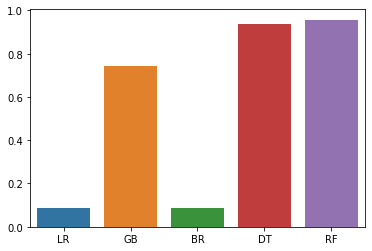

In [19]:
import seaborn as sns
x=['LR','GB','BR','DT','RF']
y=[lin_reg_score,gra_boo_score,bay_reg_score, decision_reg_score, rand_for_score]
sns.barplot(x,y)


In [0]:
#We can see that Random Forest Regressor has the highest accuracy of 95.7%

In [21]:
#Preparing the Validation data for prediction
valid_data['Date'] = pd.to_datetime(valid_data['Date'])
valid_data['Year'] = valid_data['Date'].dt.year
valid_data['Week'] = valid_data['Date'].dt.week
valid_data['YearWeek'] = valid_data.Year.astype(str).str.cat(valid_data.Week.astype(str))
valid_data.drop(['Date', 'Year', 'Week'], axis=1, inplace=True)
valid_data['YearWeek'] = valid_data.YearWeek.astype(int)
valid_data = pd.get_dummies(valid_data)
valid_data['Type_A'] = 0
valid_data['Type_C'] = 0
valid_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,YearWeek,Type_A,Type_B,Type_C
337256,35,58,5760.00,True,46.67,3.039,0.00,0.00,0.00,0.00,0.00,136.689571,8.763,103681,201047,0,1,0
337257,35,58,5101.00,False,41.81,3.046,0.00,0.00,0.00,0.00,0.00,136.607571,8.763,103681,201048,0,1,0
337258,35,58,4310.00,False,30.83,3.109,0.00,0.00,0.00,0.00,0.00,136.525571,8.763,103681,201049,0,1,0
337259,35,58,4285.00,False,31.62,3.140,0.00,0.00,0.00,0.00,0.00,136.529281,8.763,103681,201050,0,1,0
337260,35,58,6088.00,False,31.34,3.141,0.00,0.00,0.00,0.00,0.00,136.597273,8.763,103681,201051,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,118221,201239,0,1,0
421566,45,98,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,118221,201240,0,1,0
421567,45,98,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,118221,201241,0,1,0
421568,45,98,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,118221,201242,0,1,0


In [22]:

columns2 = ["Store", "Dept", "YearWeek", "IsHoliday", "CPI", "Unemployment", "Size", "Temperature", "Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "Type_A", "Type_B", "Type_C"]
features_valid = valid_data[list(columns2)].values
features_valid

array([[35, 58, 201047, ..., 0, 1, 0],
       [35, 58, 201048, ..., 0, 1, 0],
       [35, 58, 201049, ..., 0, 1, 0],
       ...,
       [45, 98, 201241, ..., 0, 1, 0],
       [45, 98, 201242, ..., 0, 1, 0],
       [45, 98, 201243, ..., 0, 1, 0]], dtype=object)

In [0]:
#We are using random forest to predict the validation data
valid_pred = rand_for.predict(features_valid)

In [24]:
valid_data['predicted_sales']= valid_pred
valid_data

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,YearWeek,Type_A,Type_B,Type_C,predicted_sales
337256,35,58,5760.00,True,46.67,3.039,0.00,0.00,0.00,0.00,0.00,136.689571,8.763,103681,201047,0,1,0,2539.6974
337257,35,58,5101.00,False,41.81,3.046,0.00,0.00,0.00,0.00,0.00,136.607571,8.763,103681,201048,0,1,0,1634.3351
337258,35,58,4310.00,False,30.83,3.109,0.00,0.00,0.00,0.00,0.00,136.525571,8.763,103681,201049,0,1,0,1584.4936
337259,35,58,4285.00,False,31.62,3.140,0.00,0.00,0.00,0.00,0.00,136.529281,8.763,103681,201050,0,1,0,1571.9656
337260,35,58,6088.00,False,31.34,3.141,0.00,0.00,0.00,0.00,0.00,136.597273,8.763,103681,201051,0,1,0,1434.8255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,118221,201239,0,1,0,2108.2255
421566,45,98,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,118221,201240,0,1,0,2184.9228
421567,45,98,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,118221,201241,0,1,0,2304.8748
421568,45,98,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,118221,201242,0,1,0,2223.9956


In [25]:
#To better view our results I am only keeping the essential columns

valid_data.drop(['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'YearWeek', 'Type_B', 'Type_A', 'Type_C'], axis=1, inplace=True)
valid_data

,Store,Dept,Weekly_Sales,IsHoliday,predicted_sales
337256,35,58,5760.00,True,2539.6974
337257,35,58,5101.00,False,1634.3351
337258,35,58,4310.00,False,1584.4936
337259,35,58,4285.00,False,1571.9656
337260,35,58,6088.00,False,1434.8255
...,...,...,...,...,...
421565,45,98,508.37,False,2108.2255
421566,45,98,628.10,False,2184.9228
421567,45,98,1061.02,False,2304.8748
421568,45,98,760.01,False,2223.9956


In [0]:
#Now we prepare out test data just like prepared the training data earlier

test = pd.read_csv('/content/test.csv')
features = pd.read_csv('/content/features.csv')
stores = pd.read_csv('/content/stores.csv')
test_1 = test.merge(features, on=['Store','Date','IsHoliday'],how='left').fillna(0)
test_df = test_1.merge(stores, on=['Store'], how='left').fillna(0)

In [30]:
#Now we nomalize the test data

test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['Year'] = test_df['Date'].dt.year
test_df['Week'] = test_df['Date'].dt.week
test_df['YearWeek'] = test_df.Year.astype(str).str.cat(test_df.Week.astype(str))
test_df.drop(['Date', 'Year', 'Week'], axis=1, inplace=True)
test_df['YearWeek'] = test_df.YearWeek.astype(int)
test_df = pd.get_dummies(test_df)
test_df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,YearWeek,Type_A,Type_B,Type_C
0,1,1,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,151315,201244,1,0,0
1,1,1,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,151315,201245,1,0,0
2,1,1,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,151315,201246,1,0,0
3,1,1,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,151315,201247,1,0,0
4,1,1,False,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,151315,201248,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,False,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,0.000000,0.000,118221,201326,0,1,0
115060,45,98,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,0.000000,0.000,118221,201327,0,1,0
115061,45,98,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,0.000000,0.000,118221,201328,0,1,0
115062,45,98,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,0.000000,0.000,118221,201329,0,1,0


In [31]:
columns3 =  ["Store", "Dept", "YearWeek", "IsHoliday", "Size", "Unemployment", "CPI", "Temperature", "Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "Type_A", "Type_B", "Type_C"]
features_test = test_df[list(columns2)].values
features_test

array([[1, 1, 201244, ..., 1, 0, 0],
       [1, 1, 201245, ..., 1, 0, 0],
       [1, 1, 201246, ..., 1, 0, 0],
       ...,
       [45, 98, 201328, ..., 0, 1, 0],
       [45, 98, 201329, ..., 0, 1, 0],
       [45, 98, 201330, ..., 0, 1, 0]], dtype=object)

In [33]:
#Now we predict the values for the test data using Random Forest regressor

test_vals = rand_for.predict(features_test)
test_df['Predicted Sales']= test_vals
test_df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,YearWeek,Type_A,Type_B,Type_C,Predicted Sales
0,1,1,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,151315,201244,1,0,0,25998.0697
1,1,1,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,151315,201245,1,0,0,23898.0371
2,1,1,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,151315,201246,1,0,0,24317.3342
3,1,1,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,151315,201247,1,0,0,44300.7403
4,1,1,False,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,151315,201248,1,0,0,41612.0298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,False,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,0.000000,0.000,118221,201326,0,1,0,2308.6942
115060,45,98,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,0.000000,0.000,118221,201327,0,1,0,2306.1445
115061,45,98,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,0.000000,0.000,118221,201328,0,1,0,2320.1473
115062,45,98,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,0.000000,0.000,118221,201329,0,1,0,2323.2664


In [34]:
#Once again we drop few columns to better visualize our results

test_df.drop(['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'YearWeek', 'Type_B', 'Type_A', 'Type_C'], axis=1, inplace=True)
test_df

,Store,Dept,IsHoliday,Predicted Sales
0,1,1,False,25998.0697
1,1,1,False,23898.0371
2,1,1,False,24317.3342
3,1,1,True,44300.7403
4,1,1,False,41612.0298
...,...,...,...,...
115059,45,98,False,2308.6942
115060,45,98,False,2306.1445
115061,45,98,False,2320.1473
115062,45,98,False,2323.2664
